In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cont2discrete, lti, dlti, dstep
import math

------------
zoh
discrete ret=
(array([[ 0.9648525 ,  0.09882565],
       [-0.69880286,  0.9648525 ]]), array([[0.00497061],
       [0.09882565]]), array([[1., 0.]]), array([[0.]]), 0.1)
------------
bilinear
discrete ret=
(array([[ 0.9652588 ,  0.09826294],
       [-0.69482391,  0.9652588 ]]), array([[0.00491315],
       [0.09826294]]), array([[0.9826294 , 0.04913147]]), array([[0.00245657]]), 0.1)
------------
euler
discrete ret=
(array([[ 1.        ,  0.1       ],
       [-0.70710678,  1.        ]]), array([[0. ],
       [0.1]]), array([[1., 0.]]), array([[0.]]), 0.1)
------------
backward_diff
discrete ret=
(array([[ 0.93395912,  0.09339591],
       [-0.66040883,  0.93395912]]), array([[0.00933959],
       [0.09339591]]), array([[0.93395912, 0.09339591]]), array([[0.00933959]]), 0.1)
------------
foh
discrete ret=
(array([[ 0.9648525 ,  0.09882565],
       [-0.69880286,  0.9648525 ]]), array([[0.00982447],
       [0.09591804]]), array([[1., 0.]]), array([[0.00166078]]), 0.1)
------

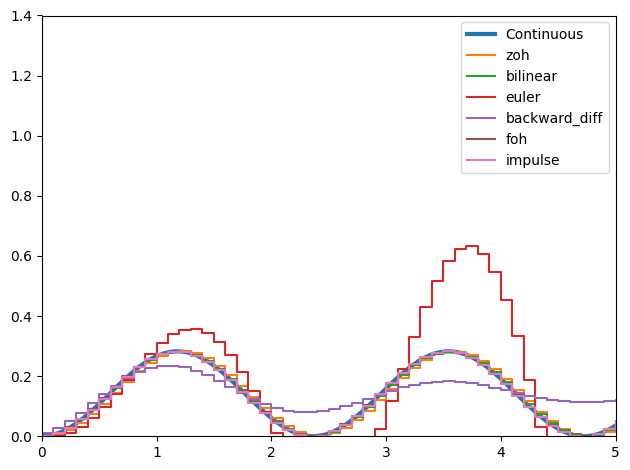

In [ ]:
# A = np.array([[0, 1],[-10., -3]])
# B = np.array([[0],[10.]])
# C = np.array([[1., 0]])
# D = np.array([[0.]])
# l_system = lti(A, B, C, D)

#这里的A,B,C,D来自 1线性化.ipynb
A = np.array([[0., 1.],[-10.*math.sin(math.pi/4), 0.]])
B = np.array([[0.],[1]])
C = np.array([[1.0,0.]])
D = np.array([[0.]])
l_system = lti(A, B, C, D)


t, x = l_system.step(T=np.linspace(0, 5, 100))
fig, ax = plt.subplots()
ax.plot(t, x, label='Continuous', linewidth=3)


#离散化
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cont2discrete.html#scipy.signal.cont2discrete
dt = 0.1
for method in ['zoh', 'bilinear', 'euler', 'backward_diff', 'foh', 'impulse']:
   d_system = cont2discrete((A, B, C, D), dt, method=method)
   print('------------')
   print(method)
   print('discrete ret=')
   print(d_system)
   s, x_d = dstep(d_system)
   ax.step(s, np.squeeze(x_d), label=method, where='post')
ax.axis([t[0], t[-1], x[0], 1.4])
ax.legend(loc='best')
fig.tight_layout()

上面使用zoh离散化的结果是
(array([[ 0.9648525 ,  0.09882565],
       [-0.69880286,  0.9648525 ]]), 

       array([[0.00497061],
       [0.09882565]]),

        array([[1., 0.]]), 

        array([[0.]]), 0.1)


期中前两个array的结果分别对应A，B,和例子一致

In [20]:

plt.show()